In [17]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

## Functions to compute Scale and Zero Point

In [26]:
def compute_scale(tensor):
    """Compute the scale for quantization."""
    qinfo = torch.iinfo(torch.int8)
    q_min, q_max = qinfo.min, qinfo.max
    r_min, r_max = tensor.min(), tensor.max()
    return (r_max - r_min) / (q_max - q_min)

def compute_zero_point(tensor, scale):
    """Compute the zero point for quantization."""
    qinfo = torch.iinfo(torch.int8)
    q_min = qinfo.min
    r_min = tensor.min()
    zero_point = torch.round(q_min - r_min / scale).int()
    return zero_point

## Functions to Quantize and Dequantize

In [27]:
def quantize(tensor, scale, zero_point):
    """Quantize the tensor."""
    qinfo = torch.iinfo(torch.int8)
    q_min, q_max = qinfo.min, qinfo.max
    quantized = torch.round(tensor / scale + zero_point).int()
    quantized = torch.clamp(quantized, q_min, q_max)  # Clamp to range
    return quantized

def dequantize(quantized, scale, zero_point):
    """Dequantize the quantized tensor."""
    return (quantized - zero_point).float() * scale

## Function to compute errors and plot

In [28]:
def compute_mse(original, dequantized):
    """Compute the Mean Squared Error (MSE)."""
    return torch.mean((original - dequantized) ** 2)


def compute_absolute_percentage_error(tensor1, tensor2):
    """Computes the Absolute Percentage Error (APE) between two tensors."""
    # Ensure tensors have the same shape
    if tensor1.shape != tensor2.shape:
        raise ValueError("Tensors must have the same shape.")

    # Compute APE
    ape = torch.abs((tensor1 - tensor2) / tensor1) * 100
    return ape


def plot_heatmaps(original, quantized, error):
    """
    Plots three heatmaps for the original tensor, quantized tensor, and the error matrix.

    Parameters:
    - original: numpy.ndarray, the original tensor.
    - quantized: numpy.ndarray, the quantized tensor.
    - error: numpy.ndarray, the error matrix.
    """
    # Define figure and axes for subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Original tensor heatmap
    sns.heatmap(original, annot=True, fmt=".2f", cmap="viridis", ax=axes[0])
    axes[0].set_title("Original Tensor")
    axes[0].set_xlabel("Column Index")
    axes[0].set_ylabel("Row Index")

    # Quantized tensor heatmap
    sns.heatmap(quantized, annot=True, fmt=".2f", cmap="viridis", ax=axes[1])
    axes[1].set_title("Quantized Tensor")
    axes[1].set_xlabel("Column Index")
    axes[1].set_ylabel("Row Index")

    # Error matrix heatmap
    sns.heatmap(error, annot=True, fmt=".2f", cmap="viridis", ax=axes[2])
    axes[2].set_title("Error Matrix")
    axes[2].set_xlabel("Column Index")
    axes[2].set_ylabel("Row Index")

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

## Example with Random Tensors

Mean Squared Error: 0.012305717915296555


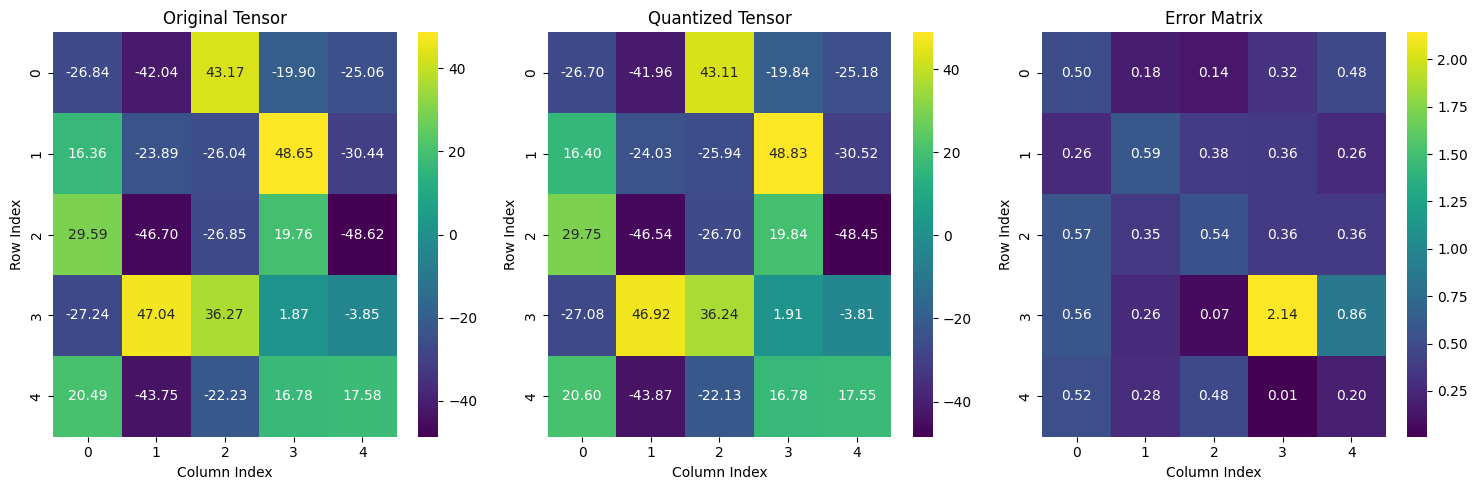

In [29]:
# Generate a random tensor with values in a specified range
tensor = torch.rand((5, 5)) * 100 - 50  # Random tensor with values between -50 and 50

# Compute scale and zero point
scale = compute_scale(tensor)
zero_point = compute_zero_point(tensor, scale)

# Quantize and dequantize the tensor
quantized = quantize(tensor, scale, zero_point)
dequantized = dequantize(quantized, scale, zero_point)

# Compute MSE
mse = compute_mse(tensor, dequantized)
print(f'Mean Squared Error: {mse.item()}')

ape = compute_absolute_percentage_error(tensor, dequantized)
# Plot error
plot_heatmaps(tensor, dequantized, ape)